# Objectives

- Try parameter extraction based on other images
- Try parameter extraction based on a "frankenset" composed of spots from various images

In [1]:
from sklearn.neighbors import KDTree
from skimage.feature import blob_log
from skimage.color import rgb2gray
from skimage.io import imread
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
import numpy as np
import pandas as pd
from fishanno import QuantiusAnnotation, SpotAnnotationAnalysis, param

%load_ext autoreload
%autoreload 2

## User Inputs

In [2]:
margin = 4					# margin around each spot, in pixels
correctness_threshold = 10
max_num_crops = 7
colors = ['cyan', 'blue', 'purple', 'violet', 'magenta', 'red', 'orange', 'yellow', 'green', ]    
crosshair_ratio = 0.04
max_num_crops = 4
max_crowded_ratio = 0.3
clustering_params = ['AffinityPropagation', -350]
declumping_params = ['KMeans', 2]

In [3]:
test_img_filenames = ['ISS_rnd0_ch1_z0', 'ISS_rnd0_ch3_z0', 'ISS_rnd1_ch1_z0']

In [4]:
thresholds = np.arange(0.1, 0.4, 0.03)

# Part 1: Parameter Extraction

### This section of the pipeline:

- Inputs:
    - sample FISH image
    - expert annotations of the image
- Outputs: 
    - parameters specific to RCA FISH for blob detection
        - max sigma: `max_sigma`
        - min sigma: `min_sigma`
        - optimal intensity threshold: `best_threshold`
    - these parameters are saved in ./sample_image_filtered/spot_params

In [5]:
if not os.path.exists('./test_images_filtered/spot_params/'):
    os.mkdir('./test_images_filtered/spot_params/')

## Param extraction using all expert annotations in test images



-------

ISS_rnd0_ch1_z0


/Users/jenny.vo-phamhi/Library/Python/3.6/lib/python/site-packages/scipy/optimize/minpack.py:449: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)


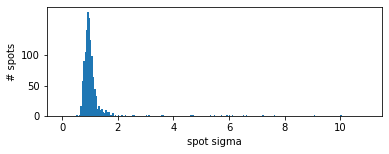

min_sigma = 0.5439853839887592
max_sigma = 16.93503911554834
best_threshold = 0.1


-------

ISS_rnd0_ch3_z0


/Users/jenny.vo-phamhi/Library/Python/3.6/lib/python/site-packages/scipy/optimize/minpack.py:449: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)


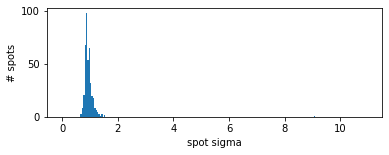

min_sigma = 0.6808431940252648
max_sigma = 9.067948807391497
best_threshold = 0.13


-------

ISS_rnd1_ch1_z0


/Users/jenny.vo-phamhi/Library/Python/3.6/lib/python/site-packages/scipy/optimize/minpack.py:449: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)


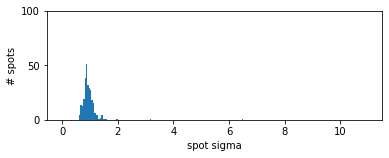

min_sigma = 0.6122035800129866
max_sigma = 6.467219361254079
best_threshold = 0.22


In [14]:
for test_img_filename in test_img_filenames:
    
    print('\n\n-------\n\n' + test_img_filename)
    
    test_img_path = './test_images_filtered/images/%s.png' % test_img_filename
    test_coords_path = './test_images_filtered/coords/%s.csv' % test_img_filename
    
    test_coords = np.genfromtxt(test_coords_path, delimiter=',')[1:]
    sigma_list = param.get_sigma_list(test_img_path, test_coords, margin)

    plt.figure(figsize=(6,2))
    plt.hist(sigma_list, bins=np.arange(0, 11, 0.05))
    plt.yticks([0, 50, 100])
    plt.xlabel('spot sigma')
    plt.ylabel('# spots')
    plt.show()
    
    min_sigma = min(sigma_list)
    max_sigma = max(sigma_list)

    best_threshold, best_recall, best_precision, recall_list, precision_list = param.get_best_threshold(
        test_coords, test_img_path, min_sigma, max_sigma, correctness_threshold, thresholds)

    print('min_sigma = ' + str(min_sigma))
    print('max_sigma = ' + str(max_sigma))
    print('best_threshold = ' + str(best_threshold))



-------

ISS_rnd0_ch1_z0


/Users/jenny.vo-phamhi/Library/Python/3.6/lib/python/site-packages/scipy/optimize/minpack.py:449: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)


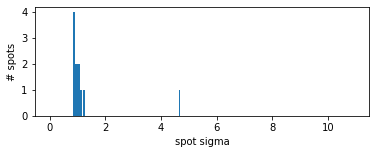

min_sigma = 0.8581225572535407
max_sigma = 4.651439437410175
best_threshold = 0.1


-------

ISS_rnd0_ch3_z0


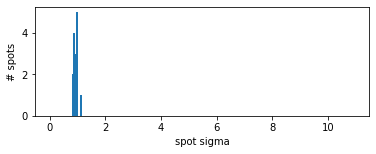

min_sigma = 0.830032386232189
max_sigma = 1.106906003107071
best_threshold = 0.16


-------

ISS_rnd1_ch1_z0


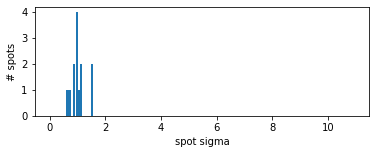

min_sigma = 0.6434634462474935
max_sigma = 1.5159541169394164
best_threshold = 0


In [15]:
for test_img_filename in test_img_filenames:
    
    print('\n\n-------\n\n' + test_img_filename)
    
    test_img_path = './test_images_filtered/images/%s.png' % test_img_filename
    test_coords_path = './test_images_filtered/coords/%s.csv' % test_img_filename
    
    test_coords = np.genfromtxt(test_coords_path, delimiter=',')[1:]
    
    sel = np.random.choice(len(test_coords), 15)
    sel_list = [test_coords[ind] for ind in sel]
    test_coords = np.asarray(sel_list)
    
    sigma_list = param.get_sigma_list(test_img_path, test_coords, margin)

    plt.figure(figsize=(6,2))
    plt.hist(sigma_list, bins=np.arange(0, 11, 0.05))
    plt.xlabel('spot sigma')
    plt.ylabel('# spots')
    plt.show()
    
    min_sigma = min(sigma_list)
    max_sigma = max(sigma_list)

    best_threshold, best_recall, best_precision, recall_list, precision_list = param.get_best_threshold(
        test_coords, test_img_path, min_sigma, max_sigma, correctness_threshold, thresholds)

    print('min_sigma = ' + str(min_sigma))
    print('max_sigma = ' + str(max_sigma))
    print('best_threshold = ' + str(best_threshold))